In [ ]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', False)

In [ ]:
df = pd.read_csv("https://github.com/Venkat3103/2022Fall_projects/blob/main/ipl_2018_2020_bbb.csv?raw=true")
match_info = pd.read_csv("https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/ipl_match_info.csv")
bowler_info = pd.read_excel("https://github.com/Venkat3103/2022Fall_projects/blob/main/bowler_info.xlsx?raw=true")
teamsheet = pd.read_csv('https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/teamsheet.csv')

In [ ]:
df

,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.5,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43152,43152,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.4,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abhishek Sharma,NA Saini,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43153,43153,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.5,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43154,43154,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.6,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,caught,Abhishek Sharma,NaN,NaN
43155,43155,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.7,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abdul Samad,NA Saini,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
os.mkdir('/content/competition_data')

In [ ]:
import requests, zipfile, io
req = requests.get("https://cricsheet.org/downloads/ipl_male_csv2.zip") 
z = zipfile.ZipFile(io.BytesIO(req.content))
z.extractall("/content/competition_data/ipl")

In [ ]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [ ]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 17.1, 17.2, 17.3, 17.4,
       17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 19.1, 19.2,
       19.3, 19.4, 19.5, 19.6,  1.7,  2.7,  5.7,  7.7, 11.7, 13.7, 15.7,
        9.7,  8.7, 18.8, 10.7, 12.7, 19.7, 19.8,  0.8,  6.8, 14.7, 17.7,
        2.8, 11.8, 11.9, 15.8,  3.7, 12.8, 12.9, 17

In [ ]:
def adjust_ball_number(df):  
  """
  returns a dataframe with ball number in the range of .1 and .6
  :param df: dataframe with ball by ball data
  :return df: updated dataframe
  """
  for i in range(1,len(df)):
    if(df['match_id'][i] == df['match_id'][i-1] and df['innings'][i] == df['innings'][i-1]):
      if (not (math.isnan(df['wides'][i-1]))) or (not math.isnan(df['noballs'][i-1]) or (df['wicket_type'][i] == 'run out')):
        df['ball'][i] = df['ball'][i-1]
      elif(math.floor(df['ball'][i]) == math.floor(df['ball'][i-1])):
        df['ball'][i] = round(df['ball'][i-1]+.1,1)
        if(round(df['ball'][i] - math.floor(df['ball'][i]),1) > 0.6):
          curi = i
          while(df['ball'][curi] > math.floor(df['ball'][i]) and not df['legbyes'][curi] > 0):
            df['ball'][curi] = round(df['ball'][curi]-.1,1)
            curi -= 1
  return df

In [ ]:
adjust_ball_number(df)

<ipython-input-9-00b1c43b648b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][i] = round(df['ball'][i-1]+.1,1)
<ipython-input-9-00b1c43b648b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][i] = df['ball'][i-1]
<ipython-input-9-00b1c43b648b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][curi] = round(df['ball'][curi]-.1,1)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43152,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.4,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abhishek Sharma,NA Saini,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43153,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.4,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43154,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.5,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,caught,Abhishek Sharma,NaN,NaN
43155,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.6,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abdul Samad,NA Saini,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,  7.3,
        7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 11.1,
       11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4, 14.5,
       14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2, 16.3, 16.4,
       16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1, 18.2, 18.3,
       18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4, 19.5,  0.6, 11. , 19.6])

In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
df["batting_team"] = np.where(df["batting_team"] == "Delhi Daredevils", "Delhi Capitals", df["batting_team"])
df["bowling_team"] = np.where(df["bowling_team"] == "Delhi Daredevils", "Delhi Capitals", df["bowling_team"])

In [ ]:
match_info = match_info.replace("Delhi Daredevils","Delhi Capitals")

In [ ]:
df['is_wicket'] = np.where(df['wicket_type'].isnull(),0,1)

In [ ]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_wicket
0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43152,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.4,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abhishek Sharma,NA Saini,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
43153,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.4,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
43154,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.5,Sunrisers Hyderabad,Royal Challengers Bangalore,Abhishek Sharma,JO Holder,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,caught,Abhishek Sharma,NaN,NaN,1
43155,1216502,2020/21,2020-10-31,Sharjah Cricket Stadium,2,13.6,Sunrisers Hyderabad,Royal Challengers Bangalore,JO Holder,Abdul Samad,NA Saini,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.groupby('striker')['runs_off_bat'].sum()

striker
A Dananjaya          4
A Mishra            22
A Nortje             7
AB de Villiers    1382
AD Hales           148
                  ... 
Y Prithvi Raj        0
YBK Jaiswal         40
YK Pathan          300
YS Chahal            7
Yuvraj Singh       163
Name: runs_off_bat, Length: 209, dtype: int64

In [ ]:
def get_batting_data(df):
  no_wides = df[df['wides'].isnull()]
  runs_scored = df.groupby('striker')['runs_off_bat'].sum().to_frame()
  balls_faced = no_wides.groupby('striker')['ball'].count().to_frame()
  outs = df['player_dismissed'].value_counts().rename_axis('striker').to_frame('outs')
  innings_played = df.groupby('striker').match_id.nunique()
  runs_scored.reset_index(inplace=True)
  balls_faced.reset_index(inplace=True)
  outs.reset_index(inplace=True)
  outs = outs.rename(columns={'index':'striker'})
  outs = outs[outs.striker!="-1"]
  batting_data = pd.merge(pd.merge(pd.merge(runs_scored,balls_faced, how="inner", on='striker'),outs, how="inner",on='striker'),innings_played,how="inner",on='striker')
  batting_data['Batting Average'] = batting_data['runs_off_bat']/batting_data['outs']
  batting_data['Batting Strike Rate'] = batting_data['runs_off_bat']*100/batting_data['ball']
  batting_data.rename(columns={'striker':'Player','runs_off_bat':'Runs Scored','ball':'Balls Faced','outs':'Times Dismissed','match_id':'Innings Played'},inplace=True)
  return batting_data

In [ ]:
batting_data = get_batting_data(df)
batting_data = batting_data.sort_values(by="Runs Scored",ascending=False).head(10)
batting_data

,Player,Runs Scored,Balls Faced,Times Dismissed,Innings Played,Batting Average,Batting Strike Rate
83,KL Rahul,1928,1378,37,42,52.108108,139.912917
147,S Dhawan,1636,1174,43,49,38.046512,139.352641
143,RR Pant,1523,1001,37,44,41.162162,152.147852
181,V Kohli,1465,1095,36,43,40.694444,133.789954
153,SA Yadav,1416,1039,39,44,36.307692,136.284889
166,SS Iyer,1397,1119,42,46,33.261905,124.843610
2,AB de Villiers,1382,852,29,38,47.655172,162.206573
164,SR Watson,1252,918,41,43,30.536585,136.383442
13,AT Rayudu,1243,987,35,44,35.514286,125.937183
37,DA Warner,1240,889,25,28,49.600000,139.482565


In [ ]:
def get_bowling_data(df):
  
  t20s_no_wides = df[df['wides'].isnull()]
  t20s_legal_deliveries = t20s_no_wides[t20s_no_wides['noballs'].isnull()]
  balls_bowled = t20s_legal_deliveries.groupby('bowler')['ball'].count().to_frame()
  balls_bowled.reset_index(inplace = True)
  innings_played = df.groupby('bowler').match_id.nunique()
  temp = df.copy()
  temp['wides']=temp['wides'].fillna(0)
  temp['noballs']=temp['noballs'].fillna(0)
  df['runs_conceded'] = temp['runs_off_bat']+temp['wides']+temp['noballs']
  runs_conceded = df.groupby('bowler')['runs_conceded'].sum().to_frame()
  runs_conceded.reset_index(inplace = True)
  bowler_wickets = df[df['wicket_type']!="run out"]
  bowler_wickets = bowler_wickets[bowler_wickets['wicket_type']!="retired hurt"]
  bowler_wickets = bowler_wickets[bowler_wickets['wicket_type']!="obstructing the field"]
  wickets_taken = bowler_wickets.groupby('bowler')['wicket_type'].count().to_frame()
  wickets_taken.reset_index(inplace=True)
  bowling_data = pd.merge(pd.merge(pd.merge(balls_bowled,runs_conceded, how="inner", on='bowler'),wickets_taken, how="inner",on='bowler'),innings_played,on='bowler',how="inner")
  bowling_data['Economy Rate'] = bowling_data['runs_conceded']*6/bowling_data['ball']
  bowling_data['Balls Per Wicket'] = bowling_data['ball']/bowling_data['wicket_type']
  bowling_data['Bowling Average'] = bowling_data['runs_conceded']/bowling_data['wicket_type']
  bowling_data.rename(columns={'bowler':'Bowler','runs_conceded':'Runs Conceded','ball':'Balls Bowled','wicket_type':'Wickets Taken','match_id':'innings_played'},inplace=True)
  return bowling_data

In [ ]:
bowling_data = get_bowling_data(df)
bowling_data = bowling_data.sort_values(by="Wickets Taken",ascending=False)
bowling_data

,Bowler,Balls Bowled,Runs Conceded,Wickets Taken,innings_played,Economy Rate,Balls Per Wicket,Bowling Average
60,JJ Bumrah,1070,1209.0,66,45,6.779439,16.212121,18.318182
121,Rashid Khan,1159,1189.0,58,48,6.155306,19.982759,20.500000
69,K Rabada,685,925.0,58,29,8.102190,11.810345,15.948276
157,YS Chahal,939,1154.0,51,43,7.373802,18.411765,22.627451
147,TA Boult,778,1101.0,48,34,8.491003,16.208333,22.937500
...,...,...,...,...,...,...,...,...
109,P Dubey,48,72.0,0,3,9.000000,inf,inf
111,P Ray Barman,24,56.0,0,1,14.000000,inf,inf
113,PJ Sangwan,12,19.0,0,1,9.500000,inf,inf
122,Rasikh Salam,24,42.0,0,1,10.500000,inf,inf


Hypothesis 2


Teams which adhere to pitch conditions increase their chances of winning.

Cricket is a game which is hugely affected by the pitch condition (i.e. the soil on
which the game is being played on). Different approaches work in different
conditions. We analyze what kind of strategies have been incorporated
throughout the season in general in particular venues and whether or not the
successful teams have gone to follow the pattern. Every decision on the field is
completely taken by the captain of the team and we will analyze the strategies
incorporated by successful teams.

In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_wicket', 'runs_conceded'],
      dtype='object')

In [ ]:
df.season.value_counts()

2020/21    14559
2019       14312
2018       14286
Name: season, dtype: int64

In [ ]:
df_2018 = df[df['season'] == '2018']

In [ ]:
df_2018.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_wicket', 'runs_conceded'],
      dtype='object')

In [ ]:
match_info.columns

Index(['Unnamed: 0', 'Team1', 'Team2', 'date', 'venue', 'toss_winner',
       'toss_decision', 'match_winner', 'year'],
      dtype='object')

In [ ]:
match_info

,Unnamed: 0,Team1,Team2,date,venue,toss_winner,toss_decision,match_winner,year
0,449,Mumbai Indians,Chennai Super Kings,2018-04-07,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
1,784,Delhi Capitals,Kings XI Punjab,2018-04-08,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,field,Kings XI Punjab,2018
2,858,Royal Challengers Bangalore,Kolkata Knight Riders,2018-04-08,Eden Gardens,Kolkata Knight Riders,field,Kolkata Knight Riders,2018
3,13,Rajasthan Royals,Sunrisers Hyderabad,2018-04-09,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2018
4,862,Kolkata Knight Riders,Chennai Super Kings,2018-04-10,MA Chidambaram Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
...,...,...,...,...,...,...,...,...,...
168,252,Mumbai Indians,Sunrisers Hyderabad,2020-11-03,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
169,864,Mumbai Indians,Delhi Capitals,2020-11-05,Dubai International Cricket Stadium,Delhi Capitals,field,Mumbai Indians,2020
170,398,Royal Challengers Bangalore,Sunrisers Hyderabad,2020-11-06,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
171,44,Delhi Capitals,Sunrisers Hyderabad,2020-11-08,Sheikh Zayed Stadium,Delhi Capitals,bat,Delhi Capitals,2020


In [ ]:
match_info.value_counts(subset=['venue','year','match_winner']).to_frame()

0
venue                                              year match_winner                  
MA Chidambaram Stadium                             2019 Chennai Super Kings          6
Sheikh Zayed Stadium                               2020 Mumbai Indians               6
Maharashtra Cricket Association Stadium            2018 Chennai Super Kings          5
Punjab Cricket Association IS Bindra Stadium       2019 Kings XI Punjab              5
Rajiv Gandhi International Stadium                 2018 Sunrisers Hyderabad          5
                                                   2019 Sunrisers Hyderabad          5
Sawai Mansingh Stadium                             2018 Rajasthan Royals             5
Eden Gardens                                       2018 Kolkata Knight Riders        5
Sheikh Zayed Stadium                               2020 Kolkata Knight Riders        4
M.Chinnaswamy Stadium                              2018 Royal Challengers Bangalore  4
Dubai International Cricket Stadium                2020 Sunrisers Hyderabad          4
Arun Jaitley Stadium                               2018 Delhi Capitals               4
Wankhede Stadium                                   2019 Mumbai Indians               4
Dubai International Cricket Stadium                2020 Chennai Super Kings          4
                                                        Kings XI Punjab              3
                                                        Delhi Capitals               3
Wankhede Stadium                                   2018 Mumbai Indians               3
Punjab Cricket Association IS Bindra Stadium       2018 Kings XI Punjab              3
Wankhede Stadium                                   2018 Chennai Super Kings          3
Arun Jaitley Stadium                               2019 Delhi Capitals               3
Sawai Mansingh Stadium                             2019 Rajasthan Royals             3
Sharjah Cricket Stadium                            2020 Delhi Capitals               3
Eden Gardens                                       2019 Kolkata Knight Riders        3
Sheikh Zayed Stadium                               2020 Rajasthan Royals             3
M.Chinnaswamy Stadium                              2019 Royal Challengers Bangalore  3
Dubai International Cricket Stadium                2020 Royal Challengers Bangalore  3
                                                        Mumbai Indians               3
Sharjah Cricket Stadium                            2020 Kings XI Punjab              2
                                                        Mumbai Indians               2
                                                        Rajasthan Royals             2
                                                        Sunrisers Hyderabad          2
Sheikh Zayed Stadium                               2020 Royal Challengers Bangalore  2
                                                        Sunrisers Hyderabad          2
Rajiv Gandhi International Stadium                 2019 Mumbai Indians               2
Sheikh Zayed Stadium                               2020 Delhi Capitals               2
                                                        Chennai Super Kings          2
MA Chidambaram Stadium                             2019 Mumbai Indians               2
Eden Gardens                                       2018 Sunrisers Hyderabad          2
Dubai International Cricket Stadium                2020 Kolkata Knight Riders        2
M.Chinnaswamy Stadium                              2019 Mumbai Indians               1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta... 2019 Delhi Capitals               1
Eden Gardens                                       2019 Rajasthan Royals             1
                                                        Delhi Capitals               1
                                                        Chennai Super Kings          1
Sharjah Cricket Stadium                            2020 Royal Challengers Bangalore

In [ ]:
match_info['Team1'] = match_info['Team1'].replace(['Delhi Daredevils'], 'Delhi Capitals')
match_info['Team2'] = match_info['Team2'].replace(['Delhi Daredevils'], 'Delhi Capitals')
match_info['toss_winner'] = match_info['toss_winner'].replace(['Delhi Daredevils'], 'Delhi Capitals')
match_info['match_winner'] = match_info['match_winner'].replace(['Delhi Daredevils'], 'Delhi Capitals')

In [ ]:
team_list = match_info.Team1.unique().tolist()

In [ ]:
team_list

['Mumbai Indians',
 'Delhi Capitals',
 'Royal Challengers Bangalore',
 'Rajasthan Royals',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Sunrisers Hyderabad']

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,15

<Figure size 842.4x1080 with 0 Axes>

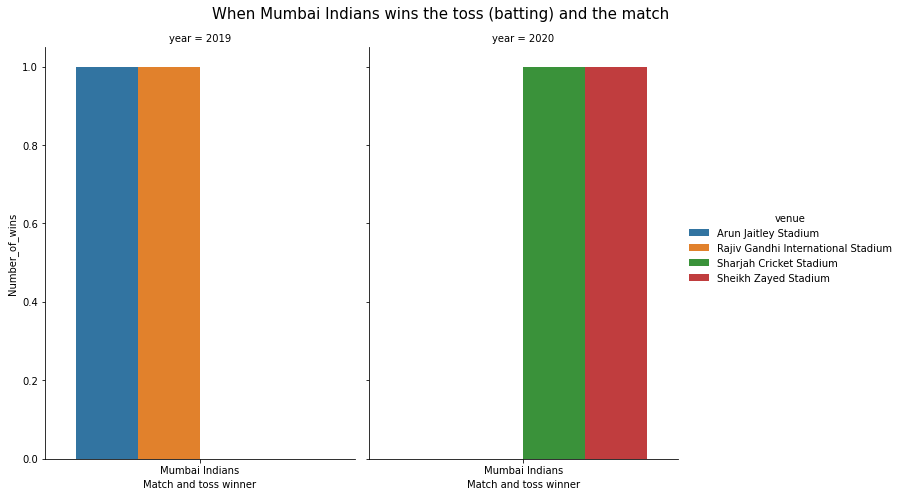

<Figure size 842.4x1080 with 0 Axes>

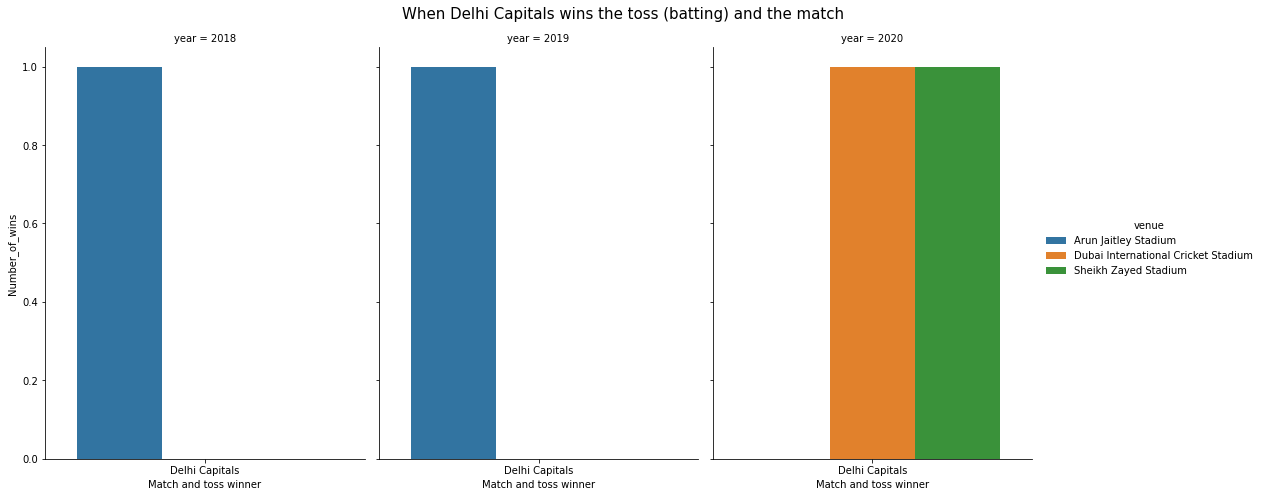

<Figure size 842.4x1080 with 0 Axes>

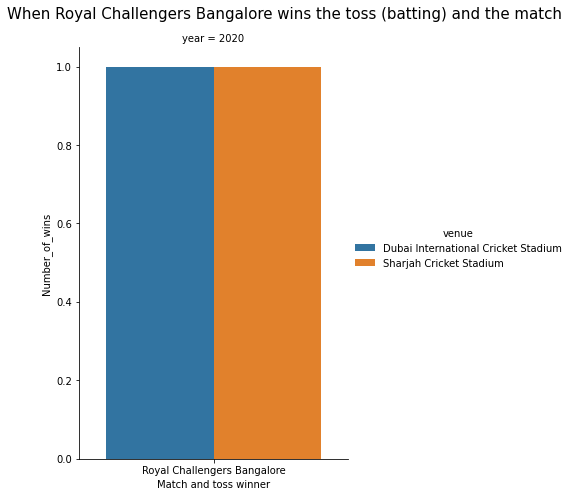

<Figure size 842.4x1080 with 0 Axes>

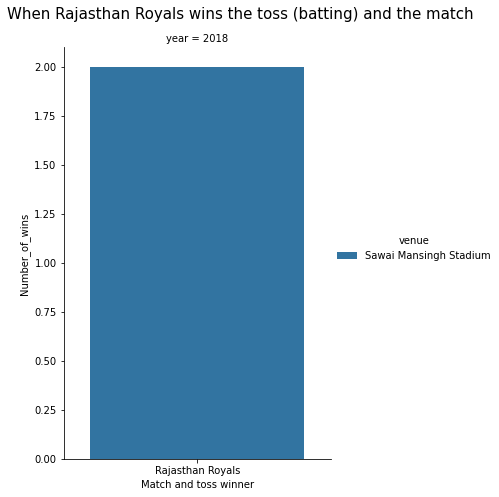

<Figure size 842.4x1080 with 0 Axes>

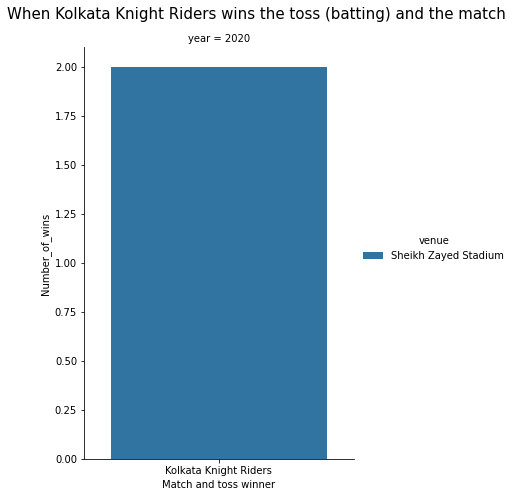

<Figure size 842.4x1080 with 0 Axes>

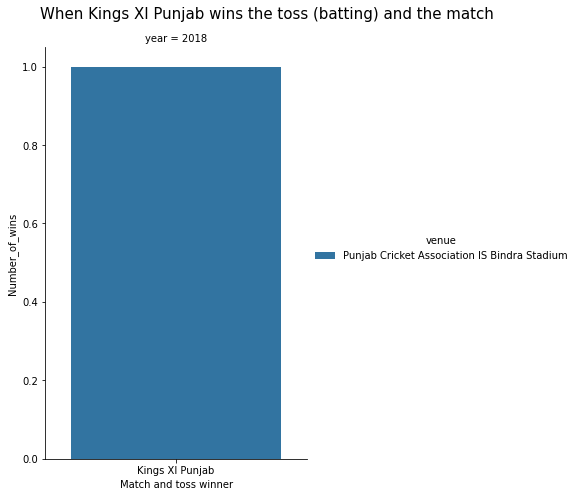

<Figure size 842.4x1080 with 0 Axes>

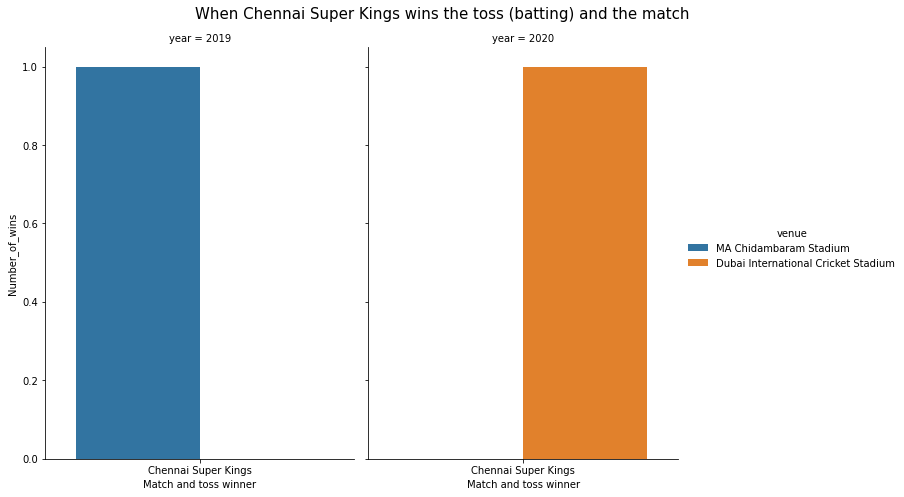

<Figure size 842.4x1080 with 0 Axes>

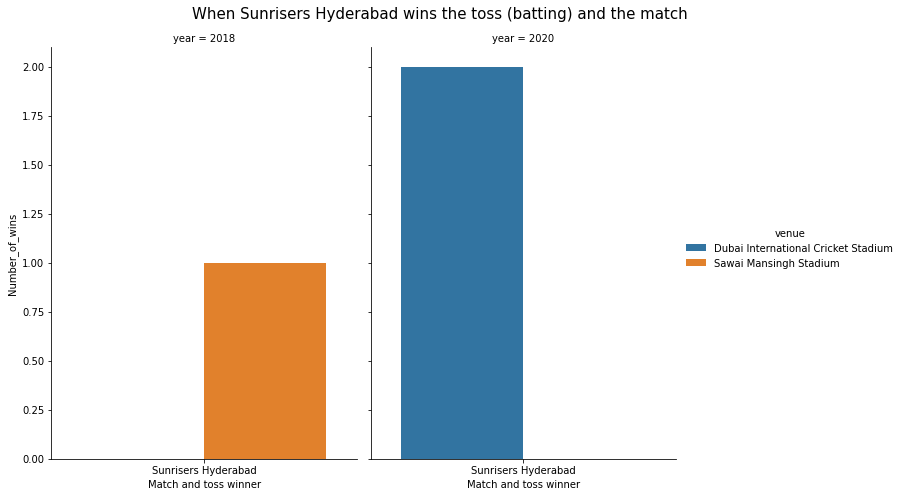

In [ ]:
import seaborn as sns
for team in team_list:
  info =  match_info[(match_info.toss_winner == team) & (match_info.match_winner == team) & (match_info.toss_decision == 'bat')]
  info2 = info[['toss_winner','match_winner','year','venue']].value_counts().to_frame().reset_index()
  info2 = info2.rename(columns={ 0 : 'Number_of_wins', 'match_winner' : 'Match and toss winner'})
  info2 = info2.drop('toss_winner', axis=1)
  plt.figure()
  plot = sns.catplot(x='Match and toss winner', y="Number_of_wins",
                 hue="venue", col="year",
                 data=info2, kind="bar",
                 height=7, aspect=.7)
  plot.fig.subplots_adjust(top=0.9)
  plot.fig.suptitle("When " + team + " wins the toss (batting) and the match",fontsize = 15)




<Figure size 842.4x1080 with 0 Axes>

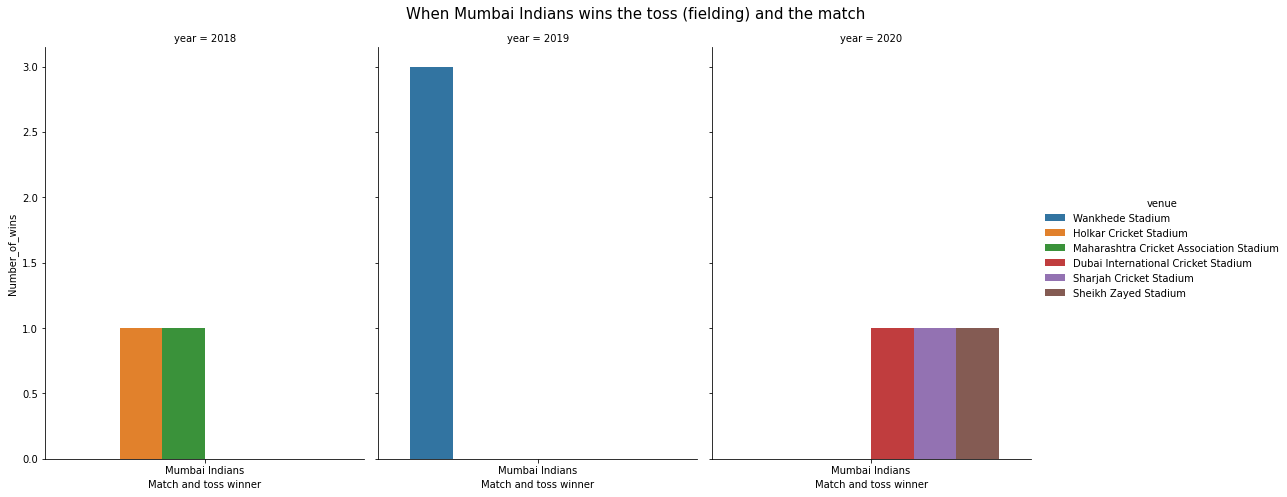

<Figure size 842.4x1080 with 0 Axes>

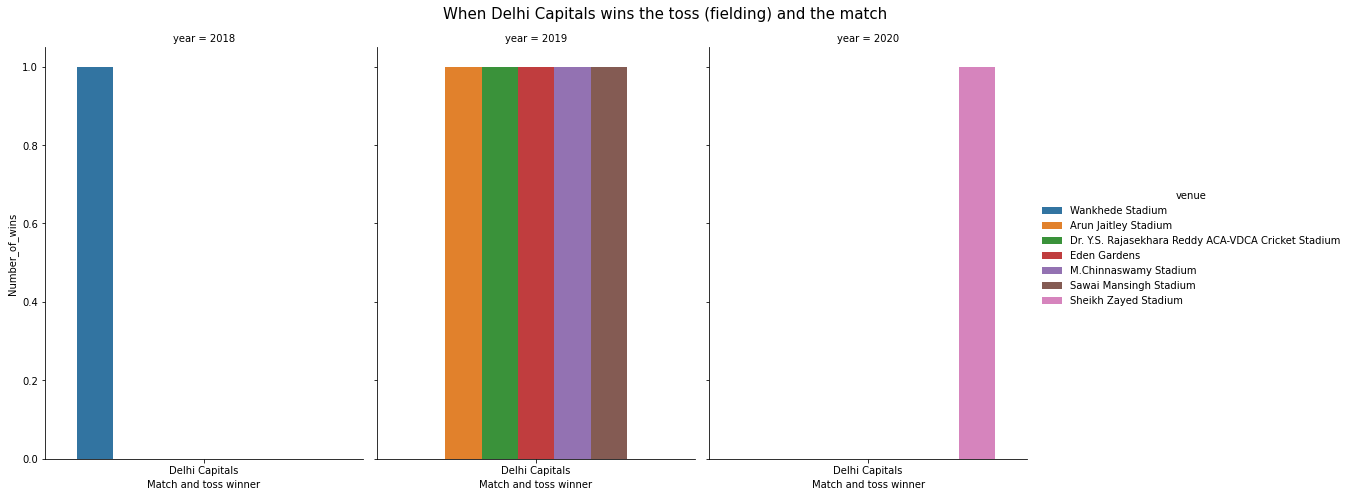

<Figure size 842.4x1080 with 0 Axes>

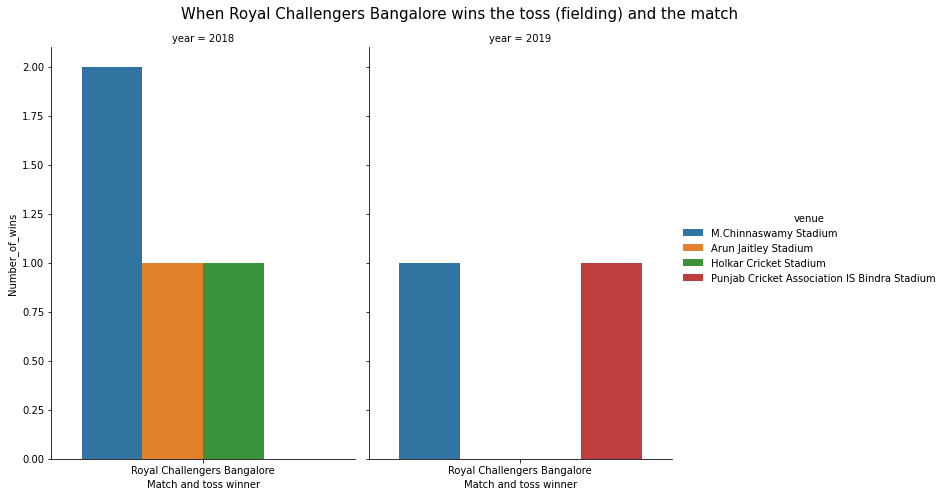

<Figure size 842.4x1080 with 0 Axes>

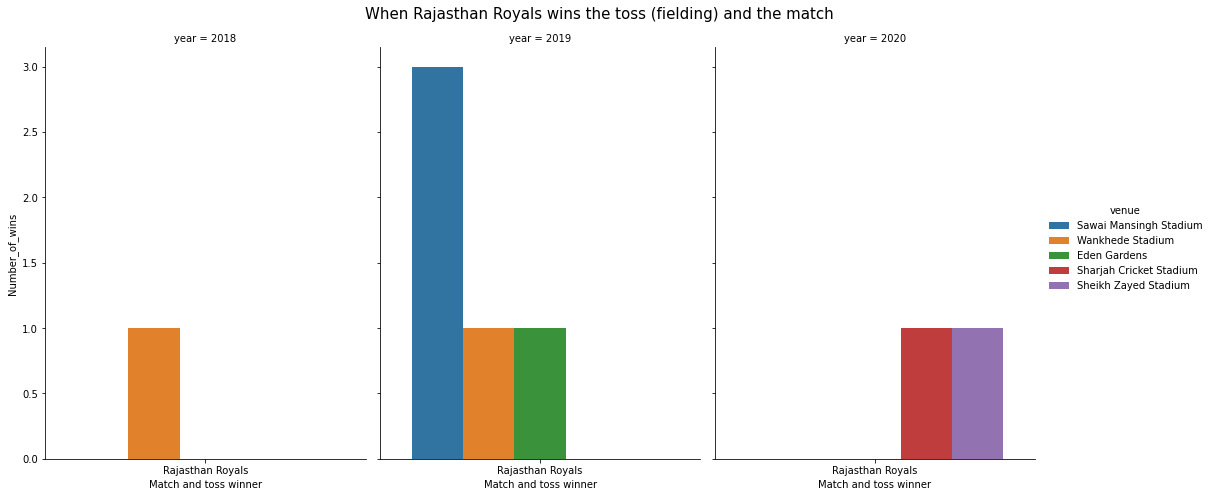

<Figure size 842.4x1080 with 0 Axes>

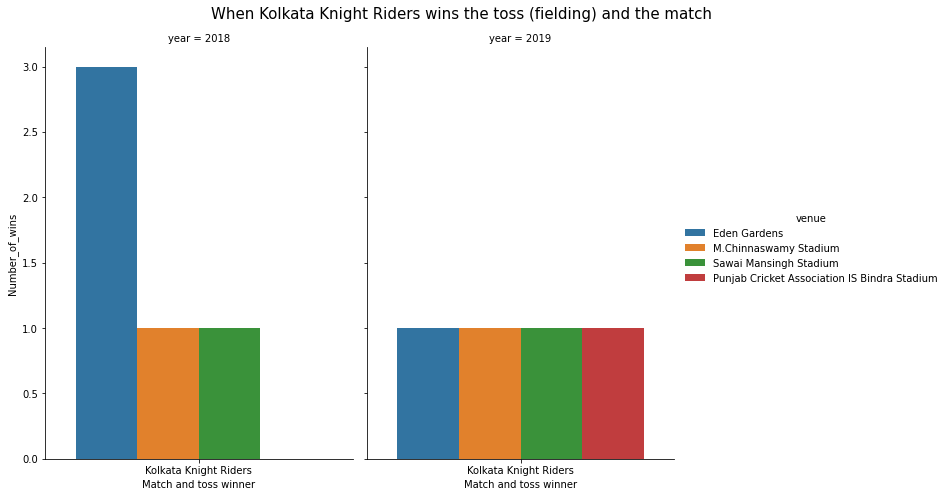

<Figure size 842.4x1080 with 0 Axes>

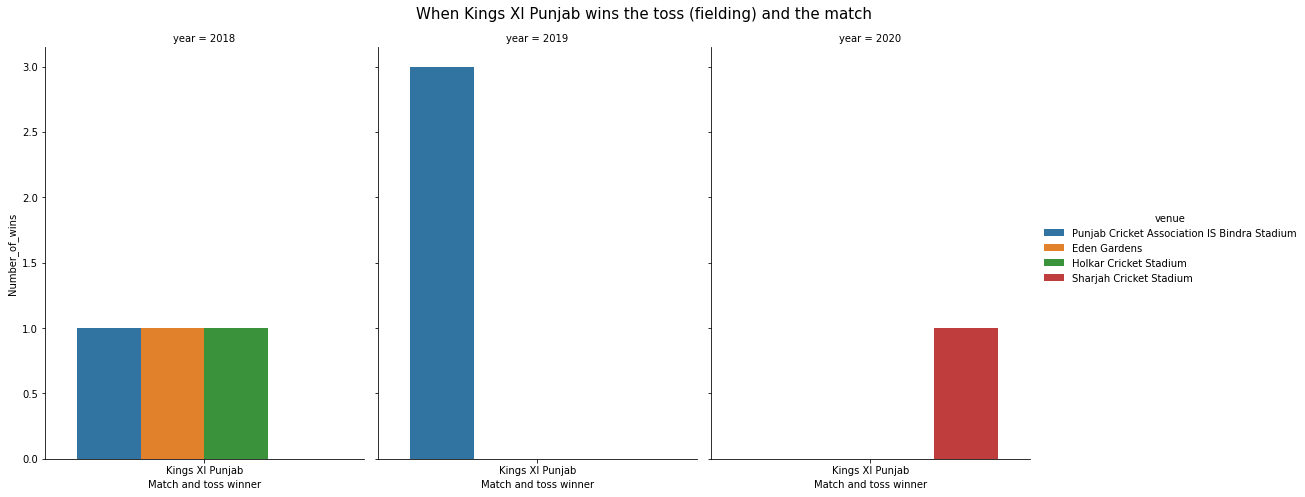

<Figure size 842.4x1080 with 0 Axes>

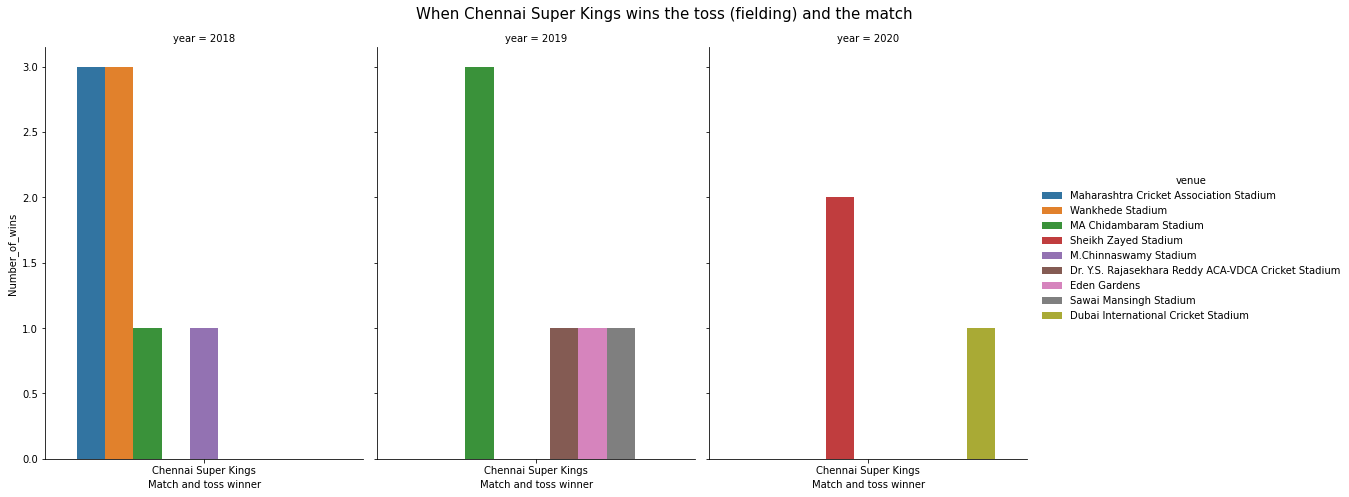

<Figure size 842.4x1080 with 0 Axes>

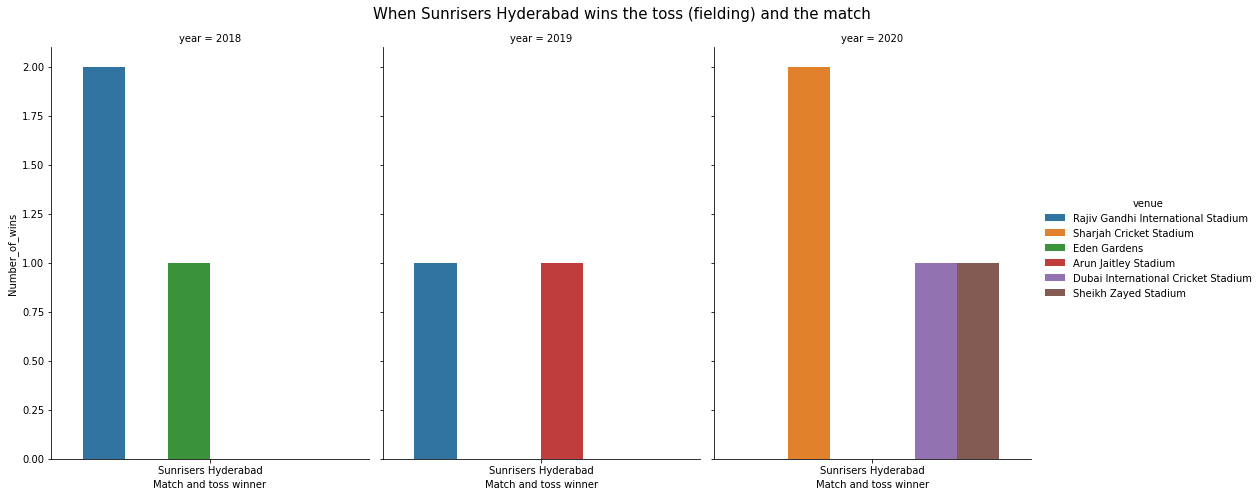

In [ ]:
import seaborn as sns
for team in team_list:
  info =  match_info[(match_info.toss_winner == team) & (match_info.match_winner == team) & (match_info.toss_decision == 'field')]
  info2 = info[['toss_winner','match_winner','year','venue']].value_counts().to_frame().reset_index()
  info2 = info2.rename(columns={ 0 : 'Number_of_wins', 'match_winner' : 'Match and toss winner'})
  info2 = info2.drop('toss_winner', axis=1)
  plt.figure()
  plot = sns.catplot(x='Match and toss winner', y="Number_of_wins",
                 hue="venue", col="year",
                 data=info2, kind="bar",
                 height=7, aspect=.7)
  plot.fig.subplots_adjust(top=0.9)
  plot.fig.suptitle("When " + team + " wins the toss (fielding) and the match",fontsize = 15)


In [ ]:
team = "Mumbai Indians"

In [ ]:
total_venues = match_info.venue.unique().tolist()

In [ ]:
total_venues

['Wankhede Stadium',
 'Punjab Cricket Association IS Bindra Stadium',
 'Eden Gardens',
 'Rajiv Gandhi International Stadium',
 'MA Chidambaram Stadium',
 'Sawai Mansingh Stadium',
 'M.Chinnaswamy Stadium',
 'Maharashtra Cricket Association Stadium',
 'Arun Jaitley Stadium',
 'Holkar Cricket Stadium',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Sheikh Zayed Stadium',
 'Dubai International Cricket Stadium',
 'Sharjah Cricket Stadium']

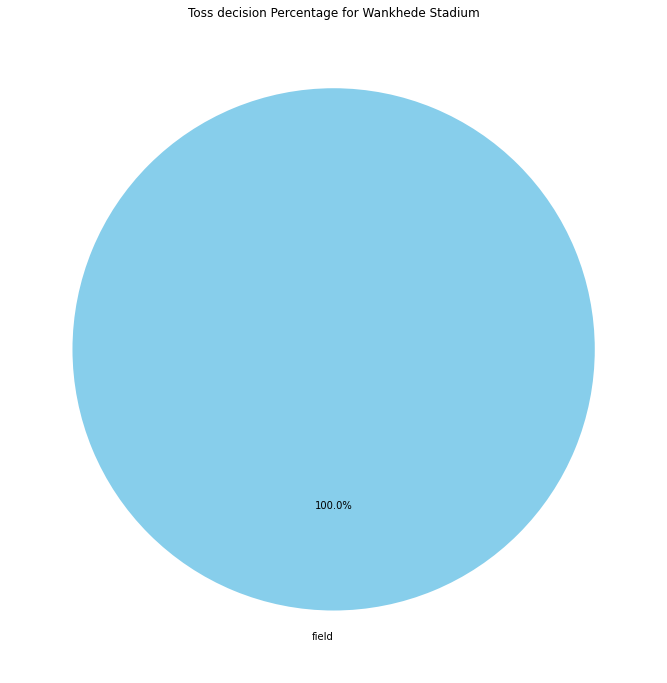

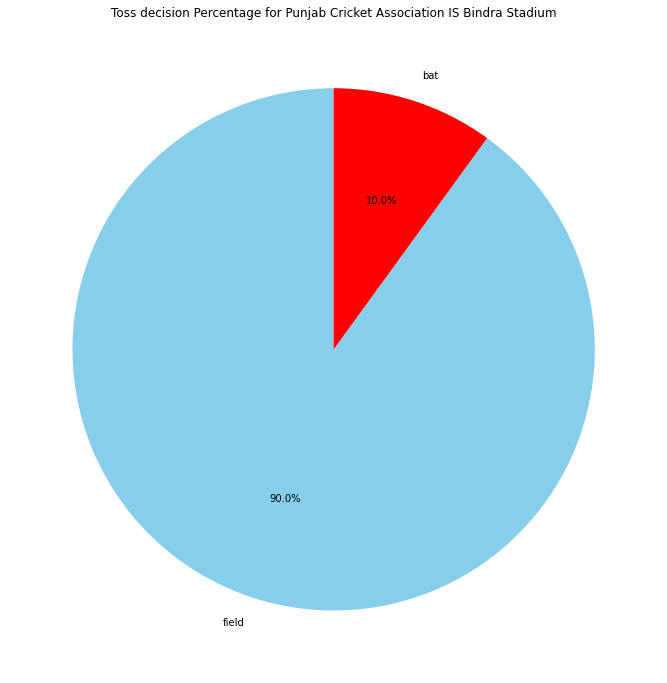

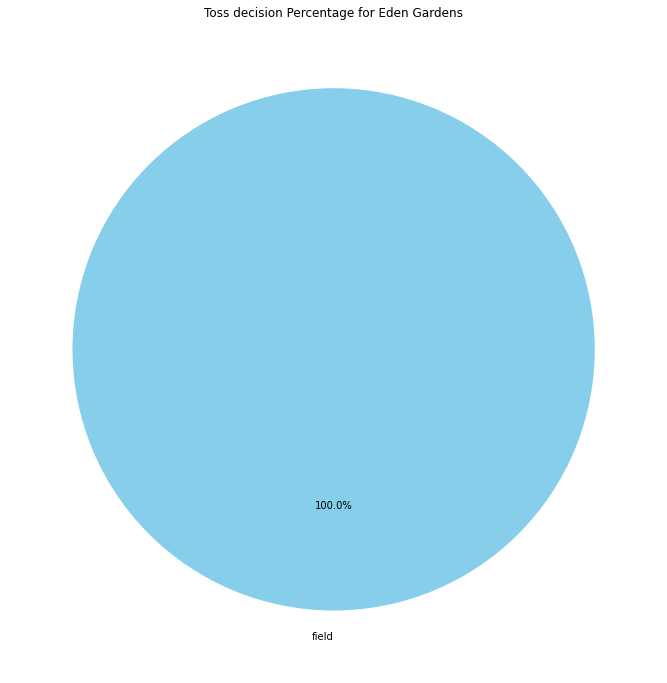

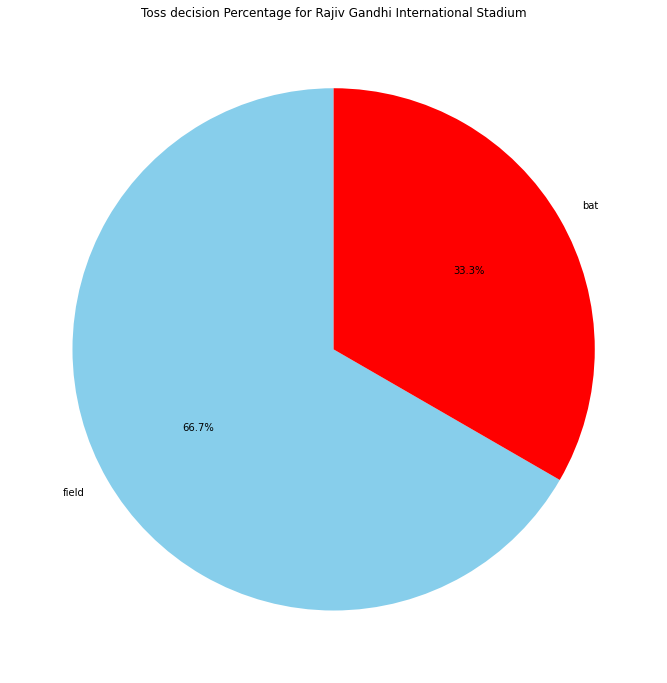

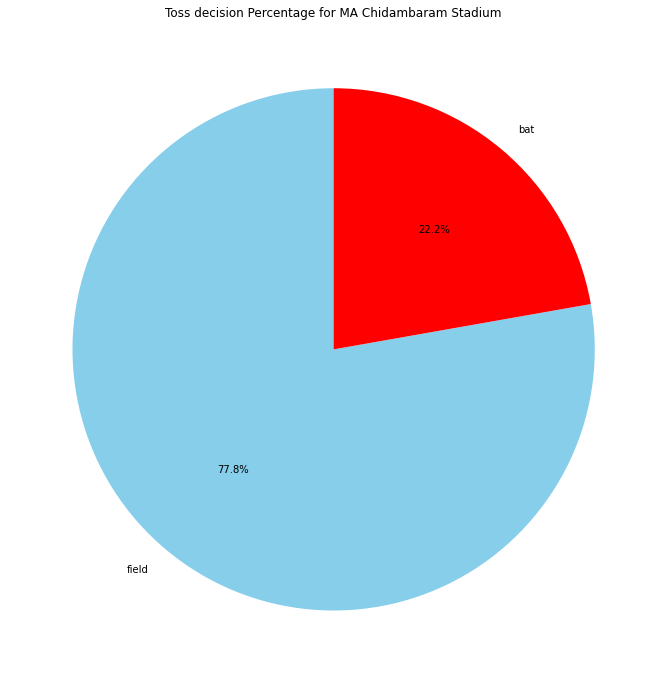

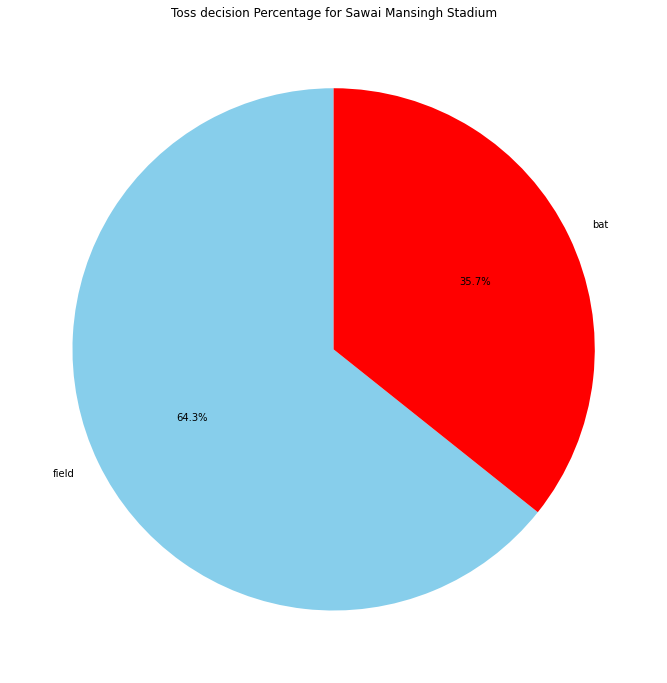

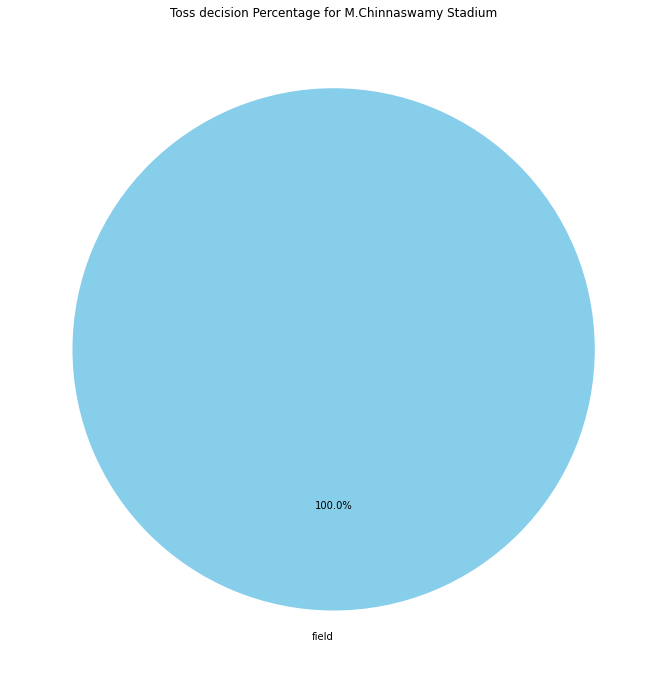

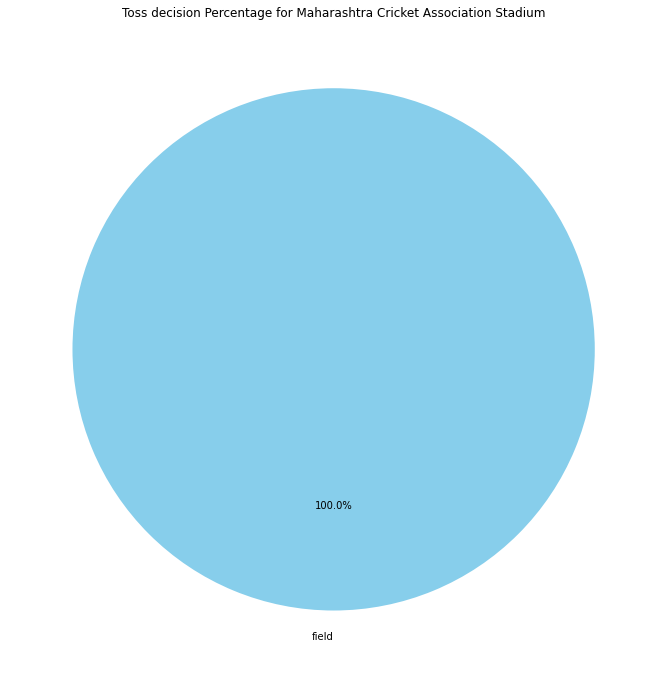

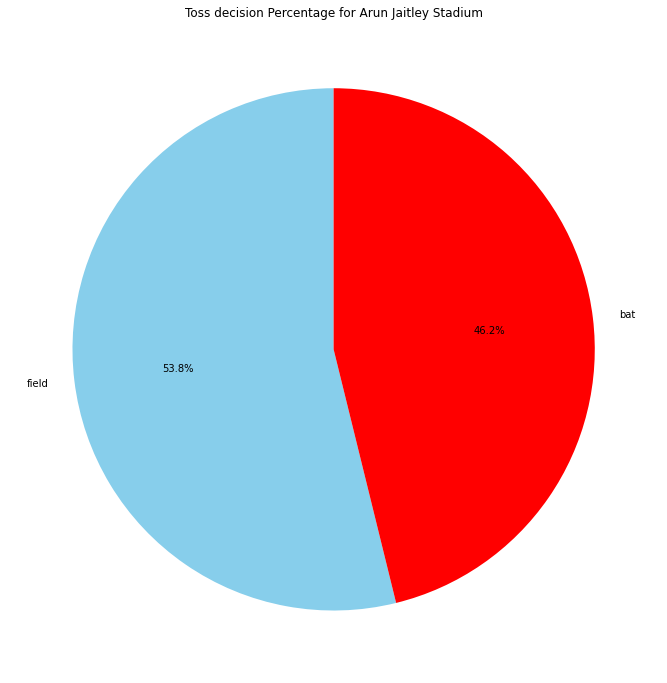

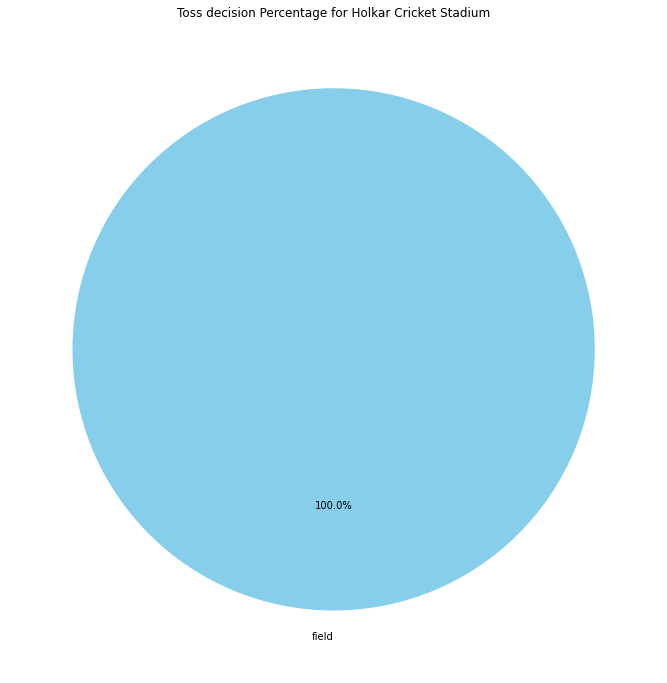

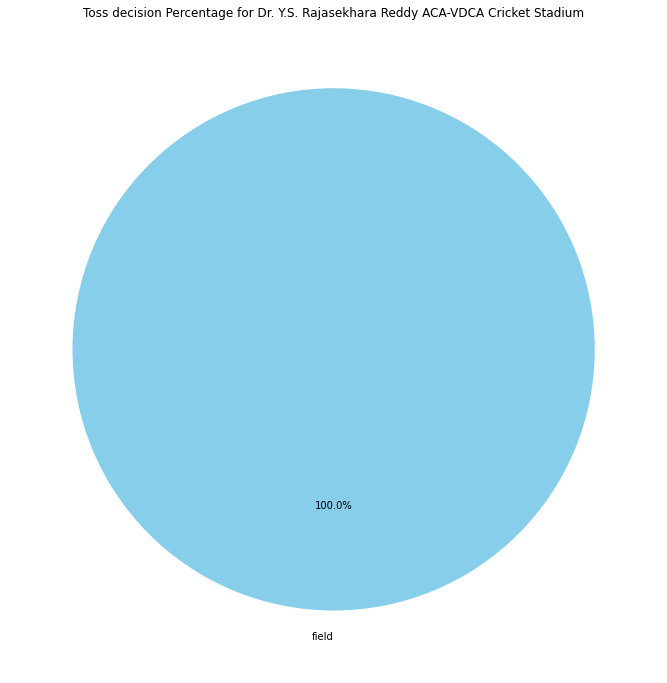

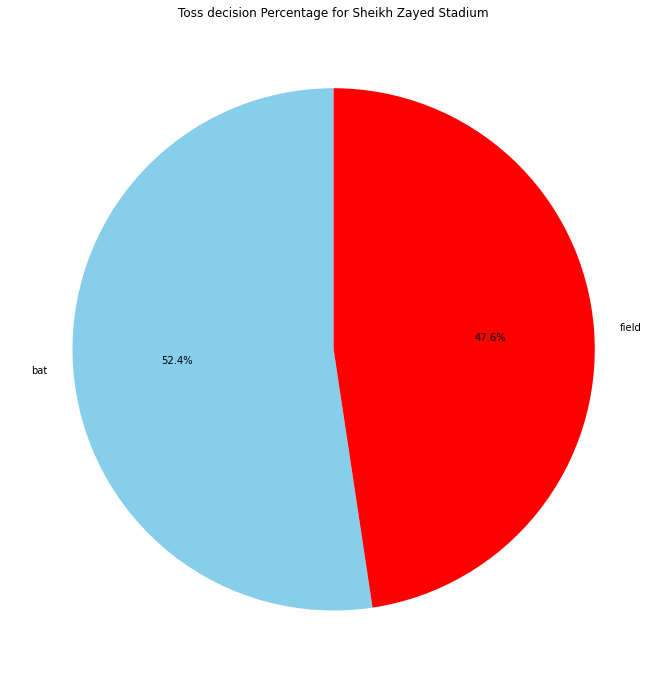

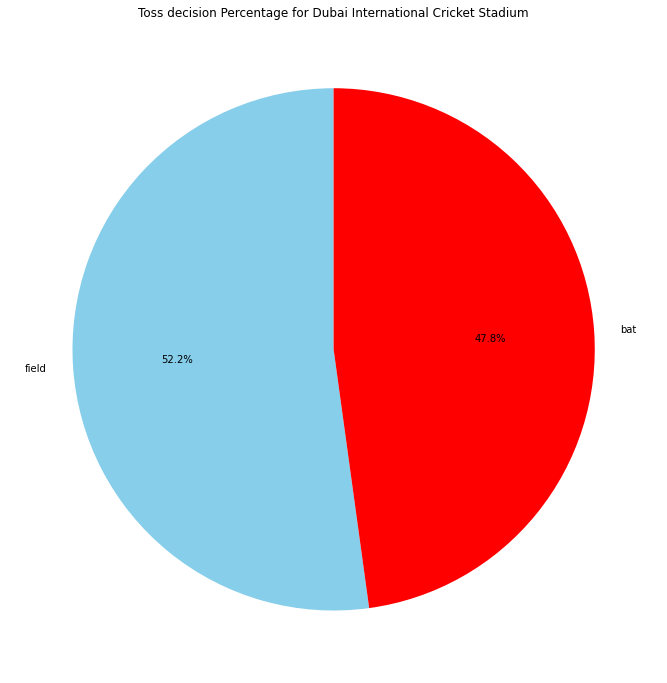

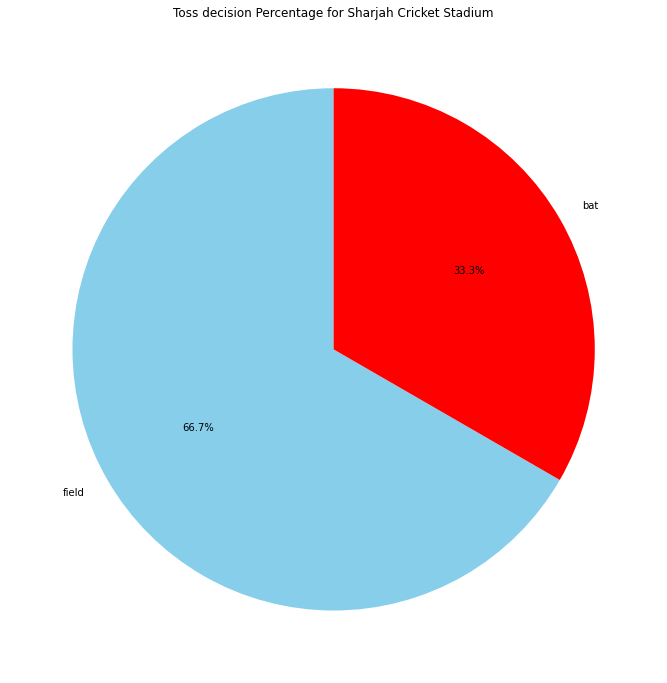

In [ ]:
for venue in total_venues:
  temp_series = match_info[(match_info['venue'] == venue)]['toss_decision'].value_counts()
  labels = (np.array(temp_series.index))
  sizes = (np.array((temp_series/temp_series.sum())*100))
  colors = ['skyblue','red']
  plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',startangle=90)
  plt.title("Toss decision Percentage for "+ venue)
  plt.show()

In [ ]:
temp_series

field    15
Name: toss_decision, dtype: int64

In [ ]:
year_list = match_info.year.unique().tolist()
venue_list = match_info.venue.unique().tolist()

In [ ]:
venue_list

['Wankhede Stadium',
 'Punjab Cricket Association IS Bindra Stadium',
 'Eden Gardens',
 'Rajiv Gandhi International Stadium',
 'MA Chidambaram Stadium',
 'Sawai Mansingh Stadium',
 'M.Chinnaswamy Stadium',
 'Maharashtra Cricket Association Stadium',
 'Arun Jaitley Stadium',
 'Holkar Cricket Stadium',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Sheikh Zayed Stadium',
 'Dubai International Cricket Stadium',
 'Sharjah Cricket Stadium']

In [ ]:
year_list

[2018, 2019, 2020]

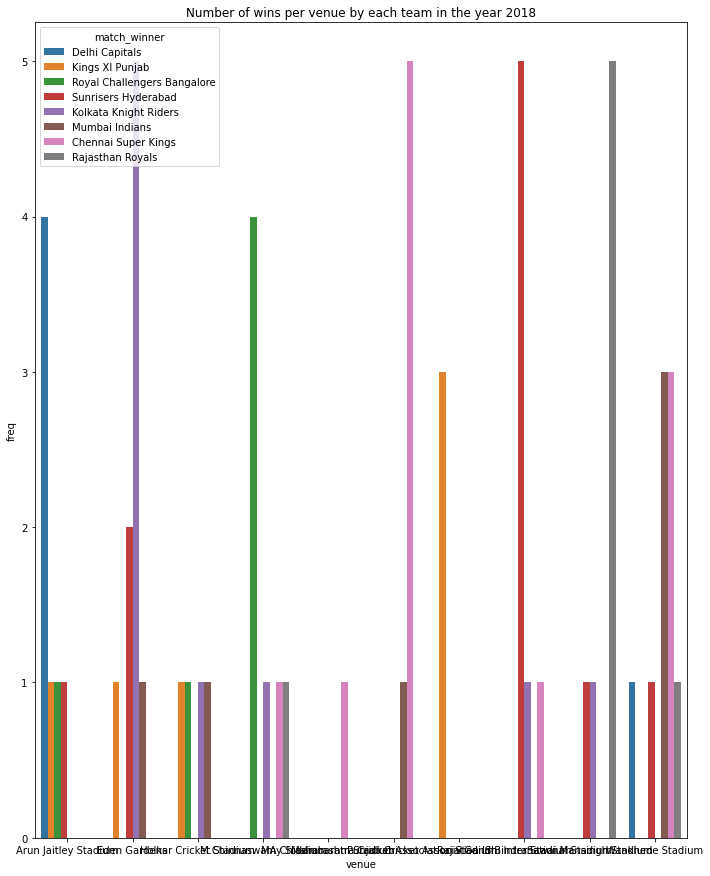

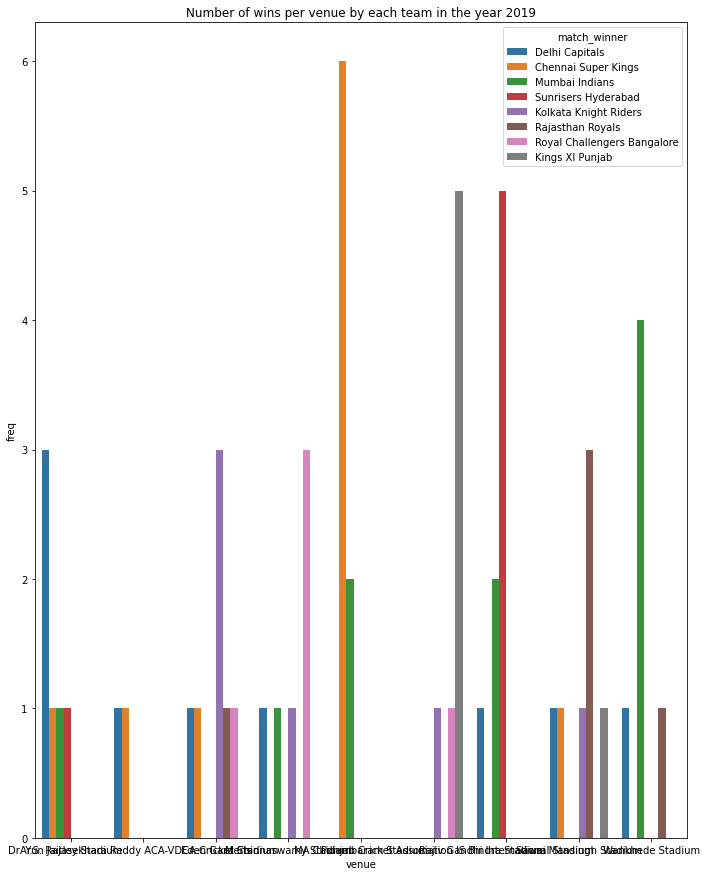

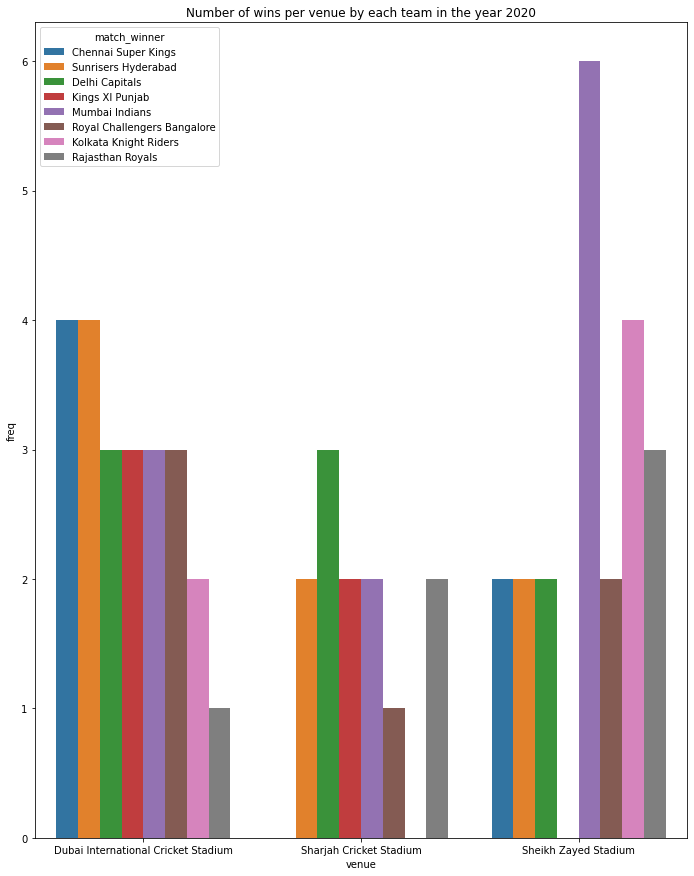

In [ ]:
for year in year_list:
  data = match_info[match_info['year'] == year]
  data2 = data.groupby('venue')['match_winner'].value_counts().to_frame('freq')
  data2.reset_index(inplace = True)
  plt.figure()
  plot = sns.barplot(x='venue',y="freq",hue="match_winner",data=data2)
  #plt.xticks(rotation="90")
  plot.set_title('Number of wins per venue by each team in the year '+str(year))

In [ ]:
bowler_info

,bowler,bowl_type,bowl_style
0,DL Chahar,Pace,MEDIUM_SEAM
1,SR Watson,Pace,MEDIUM_SEAM
2,Harbhajan Singh,Spin,OFF_SPIN
3,RA Jadeja,Spin,ORTHODOX
4,MA Wood,Pace,FAST_SEAM
...,...,...,...
154,JDS Neesham,Pace,MEDIUM_SEAM
155,Mohammed Shami,Pace,FAST_SEAM
156,P Dubey,Spin,LEG_SPIN
157,Y Prithvi Raj,Pace,MEDIUM_SEAM


In [ ]:
match_info

,Unnamed: 0,Team1,Team2,date,venue,toss_winner,toss_decision,match_winner,year
0,449,Mumbai Indians,Chennai Super Kings,2018-04-07,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
1,784,Delhi Capitals,Kings XI Punjab,2018-04-08,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,field,Kings XI Punjab,2018
2,858,Royal Challengers Bangalore,Kolkata Knight Riders,2018-04-08,Eden Gardens,Kolkata Knight Riders,field,Kolkata Knight Riders,2018
3,13,Rajasthan Royals,Sunrisers Hyderabad,2018-04-09,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2018
4,862,Kolkata Knight Riders,Chennai Super Kings,2018-04-10,MA Chidambaram Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
...,...,...,...,...,...,...,...,...,...
168,252,Mumbai Indians,Sunrisers Hyderabad,2020-11-03,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
169,864,Mumbai Indians,Delhi Capitals,2020-11-05,Dubai International Cricket Stadium,Delhi Capitals,field,Mumbai Indians,2020
170,398,Royal Challengers Bangalore,Sunrisers Hyderabad,2020-11-06,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
171,44,Delhi Capitals,Sunrisers Hyderabad,2020-11-08,Sheikh Zayed Stadium,Delhi Capitals,bat,Delhi Capitals,2020


In [ ]:
match_info

,Unnamed: 0,Team1,Team2,date,venue,toss_winner,toss_decision,match_winner,year
0,449,Mumbai Indians,Chennai Super Kings,2018-04-07,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
1,784,Delhi Capitals,Kings XI Punjab,2018-04-08,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,field,Kings XI Punjab,2018
2,858,Royal Challengers Bangalore,Kolkata Knight Riders,2018-04-08,Eden Gardens,Kolkata Knight Riders,field,Kolkata Knight Riders,2018
3,13,Rajasthan Royals,Sunrisers Hyderabad,2018-04-09,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2018
4,862,Kolkata Knight Riders,Chennai Super Kings,2018-04-10,MA Chidambaram Stadium,Chennai Super Kings,field,Chennai Super Kings,2018
...,...,...,...,...,...,...,...,...,...
168,252,Mumbai Indians,Sunrisers Hyderabad,2020-11-03,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
169,864,Mumbai Indians,Delhi Capitals,2020-11-05,Dubai International Cricket Stadium,Delhi Capitals,field,Mumbai Indians,2020
170,398,Royal Challengers Bangalore,Sunrisers Hyderabad,2020-11-06,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2020
171,44,Delhi Capitals,Sunrisers Hyderabad,2020-11-08,Sheikh Zayed Stadium,Delhi Capitals,bat,Delhi Capitals,2020


In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_wicket', 'runs_conceded'],
      dtype='object')

In [ ]:
win_team = match_info[['date','match_winner']]
win_team = win_team.rename(columns={'date' : 'start_date'})

In [ ]:
win_team

,start_date,match_winner
0,2018-04-07,Chennai Super Kings
1,2018-04-08,Kings XI Punjab
2,2018-04-08,Kolkata Knight Riders
3,2018-04-09,Sunrisers Hyderabad
4,2018-04-10,Chennai Super Kings
...,...,...
168,2020-11-03,Sunrisers Hyderabad
169,2020-11-05,Mumbai Indians
170,2020-11-06,Sunrisers Hyderabad
171,2020-11-08,Delhi Capitals


In [ ]:
bat_wins_per_venue = match_info[match_info['toss_decision'] == 'bat']['venue'].value_counts()
field_wins_per_venue = match_info[match_info['toss_decision'] == 'field']['venue'].value_counts()

In [ ]:
batting = bat_wins_per_venue.reset_index()
batting = batting.rename(columns={'index':'venue','venue':'bat_wins'})
fielding = field_wins_per_venue.reset_index()
fielding = fielding.rename(columns={'index': 'venue', 'venue':'field_wins'})

In [ ]:
Total_wins = pd.merge(batting, fielding, on='venue')

In [ ]:
Total_wins

,venue,bat_wins,field_wins
0,Sheikh Zayed Stadium,11,10
1,Dubai International Cricket Stadium,11,12
2,Arun Jaitley Stadium,6,7
3,Sawai Mansingh Stadium,5,9
4,Rajiv Gandhi International Stadium,5,10
5,Sharjah Cricket Stadium,4,8
6,MA Chidambaram Stadium,2,7
7,Punjab Cricket Association IS Bindra Stadium,1,9


In [ ]:
merged_data = pd.merge(df,win_team, how = 'outer', on = 'start_date')

In [ ]:
merged_data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_wicket,runs_conceded,match_winner
0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Sunrisers Hyderabad
1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Sunrisers Hyderabad
2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Sunrisers Hyderabad
3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Sunrisers Hyderabad
4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58577,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SR Watson,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Mumbai Indians
58578,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Mumbai Indians
58579,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,run out,SR Watson,NaN,NaN,1,1.0,Mumbai Indians
58580,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.4,Chennai Super Kings,Mumbai Indians,SN Thakur,RA Jadeja,SL Malinga,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Mumbai Indians


In [ ]:
current_match = merged_data[merged_data['match_id'] == 1136564]
first_innings_wicket_takers=current_match[(current_match['is_wicket'] == 1) & (current_match['wicket_type'] != 'run out') & (current_match['innings'] == 1)][['bowling_team','bowler']].value_counts()
second_innings_wicket_takers=current_match[(current_match['is_wicket'] == 1) & (current_match['wicket_type'] != 'run out') & (current_match['innings'] == 2)][['bowling_team','bowler']].value_counts()

In [ ]:
first_innings_wicket_takers

bowling_team         bowler         
Sunrisers Hyderabad  S Kaul             2
                     Shakib Al Hasan    2
                     B Kumar            1
                     B Stanlake         1
                     Rashid Khan        1
dtype: int64

In [ ]:
second_innings_wicket_takers

bowling_team      bowler    
Rajasthan Royals  JD Unadkat    1
dtype: int64

Highest wicket takers per venue

In [ ]:
venue_list1 = merged_data.venue.unique().tolist()

In [ ]:
venue_list1

['Rajiv Gandhi International Stadium',
 'Arun Jaitley Stadium',
 'Punjab Cricket Association IS Bindra Stadium',
 'MA Chidambaram Stadium',
 'Maharashtra Cricket Association Stadium',
 'Sawai Mansingh Stadium',
 'Sheikh Zayed Stadium',
 'Eden Gardens',
 'Wankhede Stadium',
 'Dubai International Cricket Stadium',
 'Sharjah Cricket Stadium',
 'M.Chinnaswamy Stadium',
 'Holkar Cricket Stadium',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium']

In [ ]:
current_venue = merged_data[merged_data['venue'] == 'Rajiv Gandhi International Stadium']

In [ ]:
merged_data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_wicket,runs_conceded,match_winner
0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Sunrisers Hyderabad
1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Sunrisers Hyderabad
2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Sunrisers Hyderabad
3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Sunrisers Hyderabad
4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58577,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SR Watson,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Mumbai Indians
58578,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Mumbai Indians
58579,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,run out,SR Watson,NaN,NaN,1,1.0,Mumbai Indians
58580,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,19.4,Chennai Super Kings,Mumbai Indians,SN Thakur,RA Jadeja,SL Malinga,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Mumbai Indians


In [ ]:
appended_data = []
for venue in venue_list1:  
  current_venue = merged_data[merged_data['venue'] == venue]
  wicket_takers_per_venue = current_venue[(current_venue['is_wicket'] == 1) & (current_venue['wicket_type'] != 'run out') & (current_venue['innings'] == 1)][['season','bowling_team','bowler']].value_counts().to_frame()
  wicket_takers_per_venue = wicket_takers_per_venue.reset_index()
  wicket_takers_per_venue = wicket_takers_per_venue.rename(columns={0 : 'number_of_wickets'})
  wicket_takers_per_venue['Venue'] = venue  
  out = wicket_takers_per_venue.nlargest(3, 'number_of_wickets')
  appended_data.append(out)
  #print(out)
appended_data = pd.concat(appended_data)
appended_data = appended_data.sort_values(by=['Venue'])


In [ ]:
top_wicket_takers_per_venue = appended_data[['Venue','season','bowler','number_of_wickets','bowling_team']]

In [ ]:
top_wicket_takers_per_venue = top_wicket_takers_per_venue.reset_index()

In [ ]:
top_wicket_takers_per_venue = top_wicket_takers_per_venue.drop('index', axis=1)

In [ ]:
top_wicket_takers_per_venue

In [ ]:
top_wicket_takers_per_venue = pd.merge(top_wicket_takers_per_venue, bowler_info, on='bowler')

In [ ]:
top_wicket_takers_per_venue

,Venue,season,bowler,number_of_wickets,bowling_team,bowl_type,bowl_style
0,Arun Jaitley Stadium,2019,A Mishra,8,Delhi Capitals,Spin,LEG_SPIN
1,Arun Jaitley Stadium,2019,K Rabada,7,Delhi Capitals,Pace,FAST_SEAM
2,M.Chinnaswamy Stadium,2019,K Rabada,8,Delhi Capitals,Pace,FAST_SEAM
3,Sheikh Zayed Stadium,2020/21,K Rabada,8,Delhi Capitals,Pace,FAST_SEAM
4,Arun Jaitley Stadium,2019,S Lamichhane,7,Delhi Capitals,Spin,LEG_SPIN
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,DL Chahar,2,Chennai Super Kings,Pace,MEDIUM_SEAM
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,KMA Paul,3,Delhi Capitals,Pace,FAST_SEAM
7,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,DJ Bravo,2,Chennai Super Kings,Pace,MEDIUM_SEAM
8,Dubai International Cricket Stadium,2020/21,JC Archer,9,Rajasthan Royals,Pace,FAST_SEAM
9,Sawai Mansingh Stadium,2018,JC Archer,14,Rajasthan Royals,Pace,FAST_SEAM


Text(0.5, 1.0, 'Top 3 wicket takers bowling style per Venue')

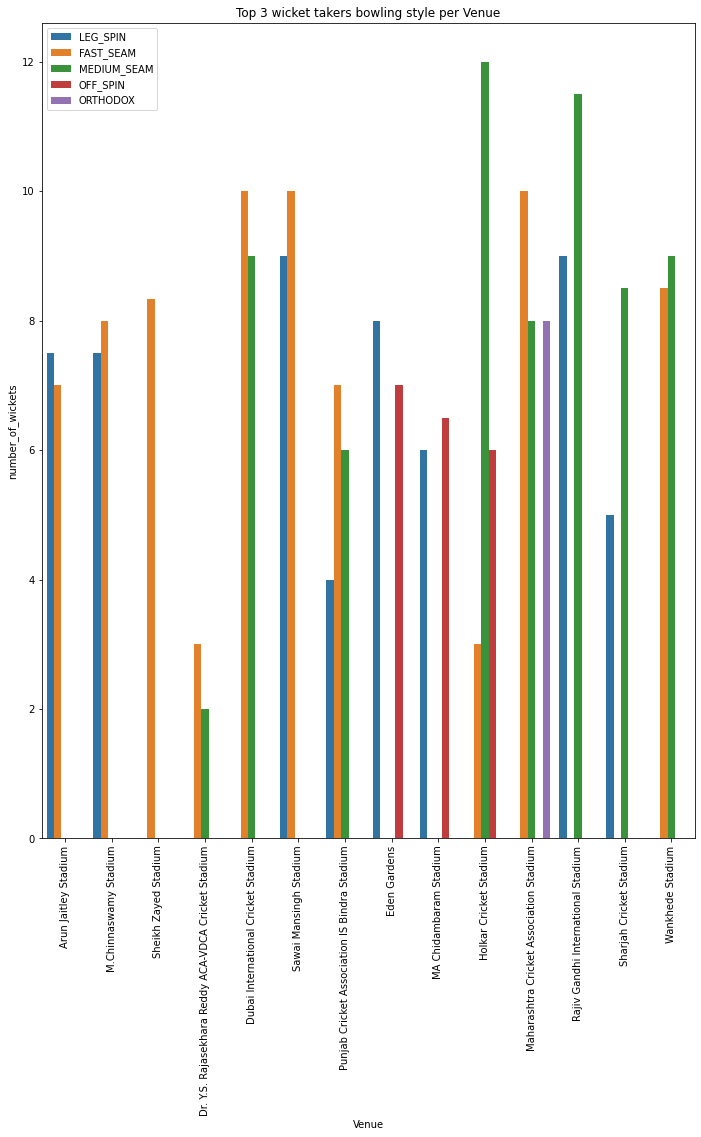

In [ ]:
plt.figure()
plot = sns.barplot(x='Venue',y="number_of_wickets",hue="bowl_style",data=top_wicket_takers_per_venue,ci = None)
plt.xticks(rotation="90")
plt.legend(loc='upper left')
plt.title("Top 3 wicket takers bowling style per Venue")

In [ ]:
df_2019 = df[df['season'] == '2019']

In [ ]:
match_info_2019 = match_info[match_info['year'] == 2019]

In [ ]:
match_info_2019.columns

Index(['Unnamed: 0', 'Team1', 'Team2', 'date', 'venue', 'toss_winner',
       'toss_decision', 'match_winner', 'year'],
      dtype='object')

In [ ]:
match_info_2019 = match_info_2019.drop(columns = 'Unnamed: 0')

In [ ]:
match_info_2019

In [ ]:
mi_2019 = match_info_2019[(match_info_2019['Team1'] == 'Mumbai Indians') | (match_info_2019['Team2'] == 'Mumbai Indians') ]

In [ ]:
venues = mi_2019.venue.unique().tolist()

In [ ]:
venues

['Wankhede Stadium',
 'M.Chinnaswamy Stadium',
 'Punjab Cricket Association IS Bindra Stadium',
 'Rajiv Gandhi International Stadium',
 'Arun Jaitley Stadium',
 'Sawai Mansingh Stadium',
 'MA Chidambaram Stadium',
 'Eden Gardens']

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for v in venues:
  data = mi_2019[mi_2019['venue'] == v]
  matches_won = data[data['match_winner'] == 'Mumbai Indians']
  toss_win_and_bat_win = data[(data['toss_winner'] == 'Mumbai Indians') & (data['toss_decision'] == 'bat') & (data['match_winner'] == 'Mumbai Indians')]
  toss_win_and_field_win =  data[(data['toss_winner'] == 'Mumbai Indians') & (data['toss_decision'] == 'field') & (data['match_winner'] == 'Mumbai Indians')]
  final_over_bowler = df_2019[(df_2019['venue'] == v) &(df_2019['bowling_team'] == 'Mumbai Indians')& (df_2019['ball'] == 19.1)]['bowler'].value_counts().to_frame().reset_index()
  df_rg = df_2019[(df_2019['venue'] == v) & (df_2019['striker'] =='RG Sharma')]
  df_rg1 = df_rg.groupby(["striker","bowling_team","start_date"]).runs_off_bat.sum().reset_index()
  df_rg2 = df_rg1[['start_date','bowling_team','striker','runs_off_bat']]
  df_rg2 = df_rg2.rename(columns = {'start_date' : 'Match_date' , 'runs_off_bat' : 'Runs_Scored'})
  total_runs = df_rg2['Runs_Scored'].sum()
  df_rg2 = df_rg2.assign(Runs_Average_per_venue = lambda x: (x['Runs_Scored']/ total_runs) *100)
  mi_20199 = df_2019[(df_2019['batting_team'] == 'Mumbai Indians') & (df_2019['venue'] == v)]
  mi_20199['first_batter']  = mi_20199.apply(lambda x: x['striker'] if x['striker']  <  x['non_striker'] else x['non_striker'], axis=1)
  mi_20199['second_batter'] = mi_20199.apply(lambda x: x['non_striker'] if x['striker']  <  x['non_striker'] else x['striker'], axis=1)
  partnership_data = mi_20199.groupby(['start_date','first_batter', 'second_batter','bowling_team'])\
                      .agg(partnership=('runs_conceded','sum')).reset_index()
  partnership_data = partnership_data.sort_values(by=['start_date','bowling_team','partnership'],ascending = False)
  print("\nMUMBAI INDIANS Statistics at " + v + ": \n")
  print("Number of matches played at " + v + " is " + str(data.shape[0]))
  print("Number of matches won at " + v+" is " + str(matches_won.shape[0]))
  print("Toss wins and chose batting and won the game : " + str(toss_win_and_bat_win.shape[0]))
  print("Toss wins and chose fielding and won the game : " + str(toss_win_and_field_win.shape[0]))
  if len(final_over_bowler) == 1:
    print("The best death over bowler in this venue is " + str(final_over_bowler['index'][0])) 
  elif len(final_over_bowler) > 1:
    print("The best death over bowlers in this venue are " + str(final_over_bowler['index'][0]) + " and " + final_over_bowler['index'][1])
  else:
    print()
  print("The best opening batsmen in this venue are " +str(mi_20199[mi_20199['ball'] == 0.1]['first_batter'].mode().values[0]) +" and " +str(mi_20199[mi_20199['ball'] == 0.1]['second_batter'].mode().values[0]))
  print("The captain's performance in this venue this season : \n")
  print(df_rg2)
  print(" \nTop 2 Biggest partnerships by Mumbai Indians this season in this venue : \n")
  print(partnership_data.head(2))



MUMBAI INDIANS Statistics at Wankhede Stadium: 

Number of matches played at Wankhede Stadium is 6
Number of matches won at Wankhede Stadium is 4
Toss wins and chose batting and won the game : 0
Toss wins and chose fielding and won the game : 3
The best death over bowlers in this venue are HH Pandya and JJ Bumrah
The best opening batsmen in this venue are Q de Kock and RG Sharma
The captain's performance in this venue this season : 

   Match_date                 bowling_team    striker  Runs_Scored  Runs_Average_per_venue
0  2019-04-03          Chennai Super Kings  RG Sharma           13                7.182320
1  2019-03-24               Delhi Capitals  RG Sharma           14                7.734807
2  2019-05-05        Kolkata Knight Riders  RG Sharma           55               30.386740
3  2019-04-13             Rajasthan Royals  RG Sharma           47               25.966851
4  2019-04-15  Royal Challengers Bangalore  RG Sharma           28               15.469613
5  2019-05-02  